In [57]:
import pandas as pd
import numpy as np

# Cargar el dataset
try:
    data = pd.read_csv('kaggle.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    data = pd.read_csv('kaggle.csv', encoding='latin1')

# Eliminar filas con valores faltantes en 'Nombre del producto' y 'Marca del producto'
data = data.dropna(subset=['Nombre del producto', 'Marca del producto'])

# Limpiar y convertir 'Precio unitario del producto' a numérico
data['Precio unitario del producto'] = pd.to_numeric(data['Precio unitario del producto'].replace('[\$,]', '', regex=True), errors='coerce')

# Manejar valores NaN en 'Precio unitario del producto'
data['Precio unitario del producto'] = data['Precio unitario del producto'].fillna(data['Precio unitario del producto'].mean())

# Convertir 'Unidades Vendidas' a entero
data['Unidades Vendidas'] = data['Unidades Vendidas'].astype(int)

# Convertir 'Fecha' a datetime
data['Fecha'] = pd.to_datetime(data['Fecha'], format='%Y%m%d')

# Verificar los cambios
print(data.info())

# Guardar el dataset limpio
data.to_csv('dataset_limpio.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 25454 entries, 0 to 25637
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Fecha                          25454 non-null  datetime64[ns]
 1   ID del producto                25454 non-null  int64         
 2   Nombre del producto            25454 non-null  object        
 3    Nombre completo del producto  25454 non-null  object        
 4   Marca del producto             25454 non-null  object        
 5   Categoría                      25454 non-null  object        
 6   Subcategoría                   25454 non-null  object        
 7   Etiquetas                      25454 non-null  object        
 8   Precio unitario del producto   25454 non-null  float64       
 9   Unidades Vendidas              25454 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.1+ MB
None


       ID del producto  Precio unitario del producto  Unidades Vendidas
count     2.545400e+04                  2.545400e+04            25454.0
mean      7.136823e+12                  1.737640e+04                1.0
std       1.872465e+12                  1.051179e+05                0.0
min       5.244812e+06                  0.000000e+00                1.0
25%       7.702010e+12                  4.170000e+03                1.0
50%       7.702189e+12                  7.390000e+03                1.0
75%       7.703616e+12                  1.399000e+04                1.0
max       9.333527e+12                  1.011905e+07                1.0


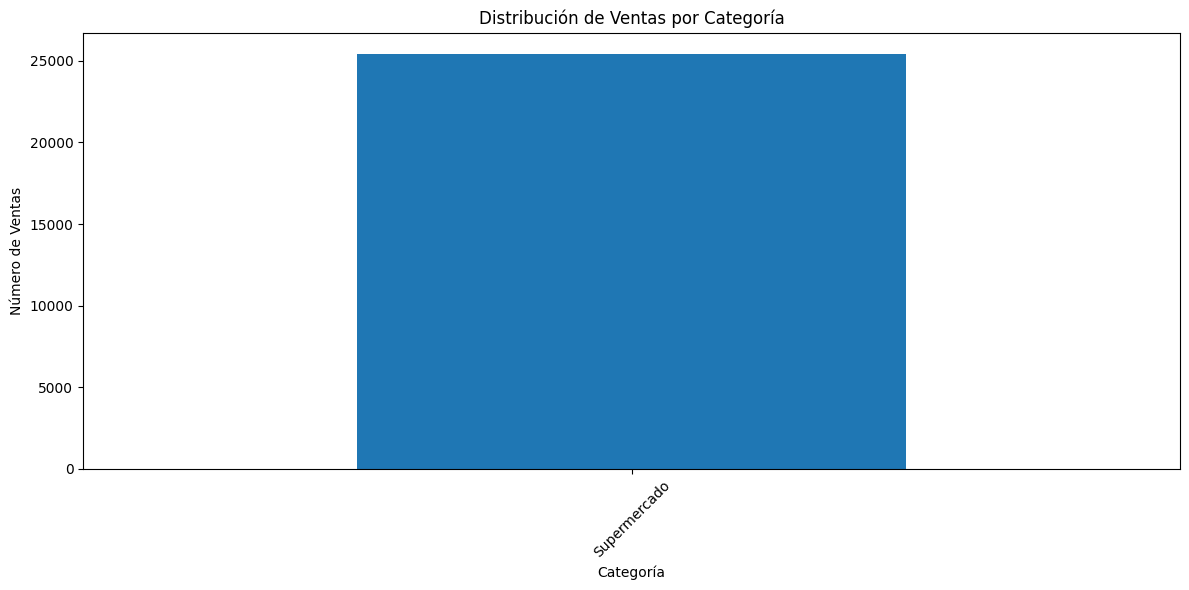

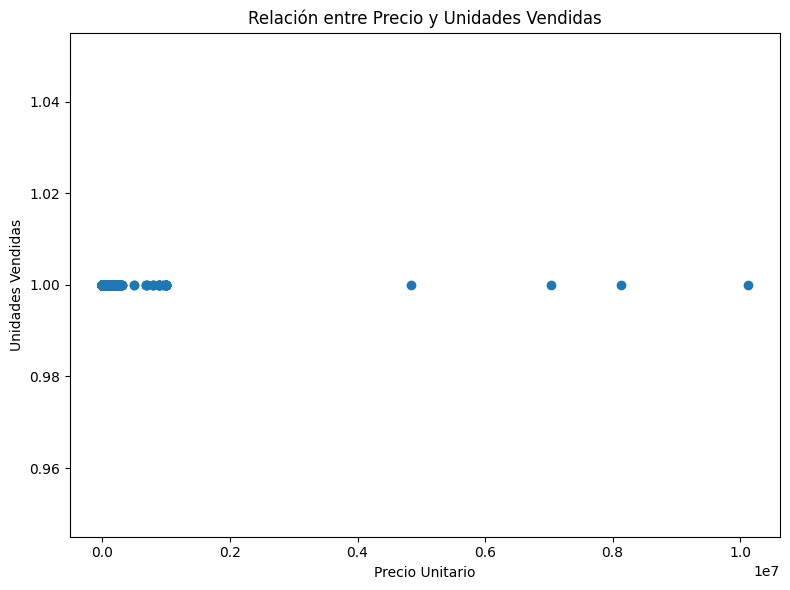

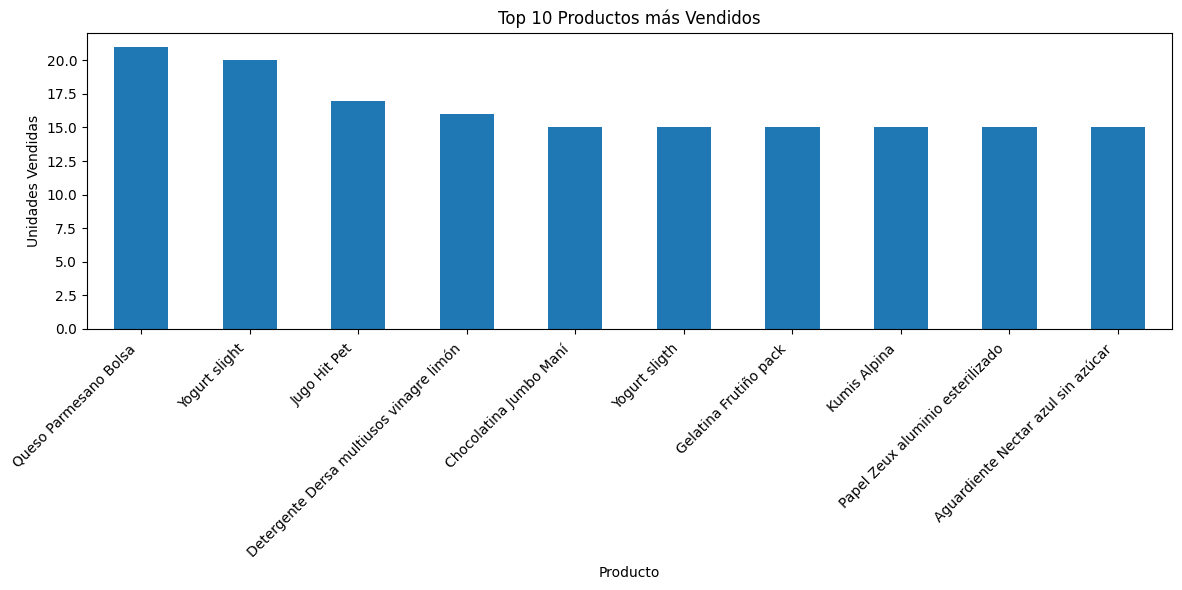

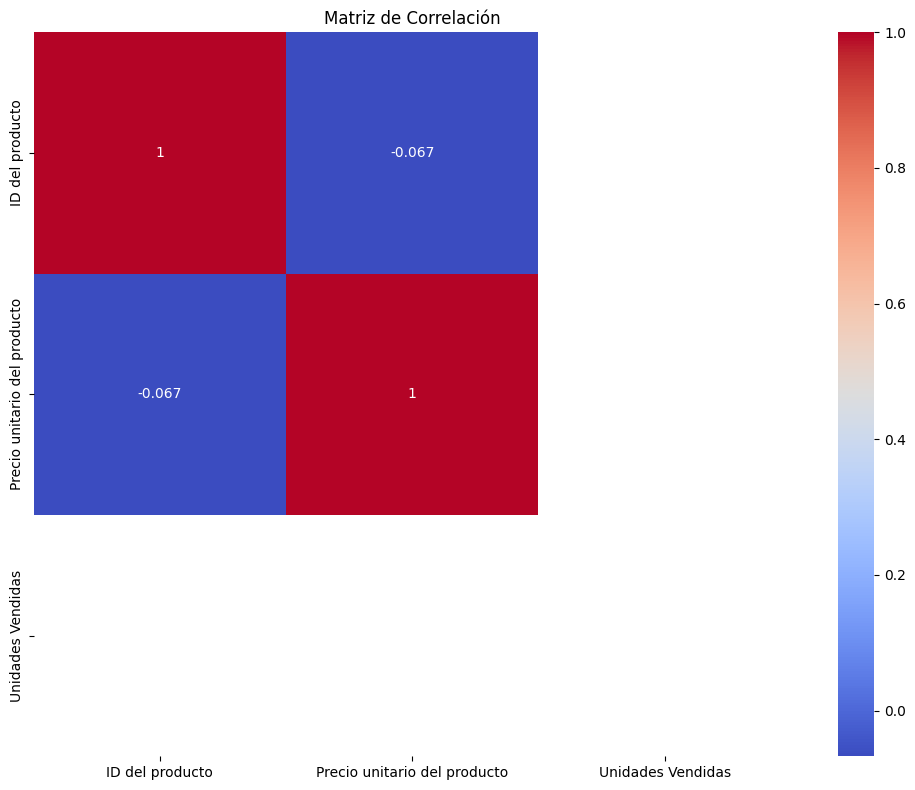

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
data = pd.read_csv('dataset_limpio.csv')

# Resumen estadístico
print(data.describe())

# Distribución de ventas por categoría
plt.figure(figsize=(12, 6))
data['Categoría'].value_counts().plot(kind='bar')
plt.title('Distribución de Ventas por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ventas_por_categoria.png')

# Correlación entre precio y unidades vendidas
plt.figure(figsize=(8, 6))
plt.scatter(data['Precio unitario del producto'], data['Unidades Vendidas'])
plt.title('Relación entre Precio y Unidades Vendidas')
plt.xlabel('Precio Unitario')
plt.ylabel('Unidades Vendidas')
plt.tight_layout()
plt.savefig('precio_vs_unidades.png')

# Top 10 productos más vendidos
top_10 = data.groupby('Nombre del producto')['Unidades Vendidas'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10.plot(kind='bar')
plt.title('Top 10 Productos más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Unidades Vendidas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_10_productos.png')

# Matriz de correlación
corr_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('matriz_correlacion.png')

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Cargar el dataset limpio
data = pd.read_csv('dataset_limpio.csv')

# Preparar los datos
X = data[['Precio unitario del producto']]
y_reg = data['Unidades Vendidas']

# Modificar la creación de y_class para asegurar dos clases
median = data['Unidades Vendidas'].median()  # Usamos la mediana en lugar de la media
y_class = (data['Unidades Vendidas'] > median).astype(int)

# Verificar la distribución de clases
print("Distribución de clases:")
print(y_class.value_counts(normalize=True))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
    X, y_reg, y_class, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_reg_train)
lr_pred = lr_model.predict(X_test_scaled)

# Regresión Logística
if len(np.unique(y_class_train)) > 1:
    log_model = LogisticRegression()
    log_model.fit(X_train_scaled, y_class_train)
    log_pred = log_model.predict(X_test_scaled)
else:
    print("No se puede realizar Regresión Logística: solo hay una clase en los datos.")

# Árbol de Decisión (Regresión)
dt_reg_model = DecisionTreeRegressor(random_state=42)
dt_reg_model.fit(X_train, y_reg_train)
dt_reg_pred = dt_reg_model.predict(X_test)

# Árbol de Decisión (Clasificación)
if len(np.unique(y_class_train)) > 1:
    dt_class_model = DecisionTreeClassifier(random_state=42)
    dt_class_model.fit(X_train, y_class_train)
    dt_class_pred = dt_class_model.predict(X_test)
else:
    print("No se puede realizar Árbol de Decisión (Clasificación): solo hay una clase en los datos.")

# Evaluación de modelos
print("\nRegresión Lineal - MSE:", mean_squared_error(y_reg_test, lr_pred))
print("Regresión Lineal - R2:", r2_score(y_reg_test, lr_pred))

if len(np.unique(y_class_train)) > 1:
    print("\nRegresión Logística - Accuracy:", accuracy_score(y_class_test, log_pred))
    print("Regresión Logística - Informe de Clasificación:")
    print(classification_report(y_class_test, log_pred))

print("\nÁrbol de Decisión (Regresión) - MSE:", mean_squared_error(y_reg_test, dt_reg_pred))
print("Árbol de Decisión (Regresión) - R2:", r2_score(y_reg_test, dt_reg_pred))

if len(np.unique(y_class_train)) > 1:
    print("\nÁrbol de Decisión (Clasificación) - Accuracy:", accuracy_score(y_class_test, dt_class_pred))
    print("Árbol de Decisión (Clasificación) - Informe de Clasificación:")
    print(classification_report(y_class_test, dt_class_pred))

Distribución de clases:
Unidades Vendidas
0    1.0
Name: proportion, dtype: float64
No se puede realizar Regresión Logística: solo hay una clase en los datos.
No se puede realizar Árbol de Decisión (Clasificación): solo hay una clase en los datos.

Regresión Lineal - MSE: 0.0
Regresión Lineal - R2: 1.0

Árbol de Decisión (Regresión) - MSE: 0.0
Árbol de Decisión (Regresión) - R2: 1.0


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Función para verificar si una variable está definida
def is_defined(variable_name):
    return variable_name in globals()

# Comparación de modelos de regresión
regression_models = []
mse_values = []
r2_values = []

if is_defined('lr_pred') and is_defined('y_reg_test'):
    regression_models.append('Regresión Lineal')
    mse_values.append(mean_squared_error(y_reg_test, lr_pred))
    r2_values.append(r2_score(y_reg_test, lr_pred))

if is_defined('dt_reg_pred') and is_defined('y_reg_test'):
    regression_models.append('Árbol de Decisión (Regresión)')
    mse_values.append(mean_squared_error(y_reg_test, dt_reg_pred))
    r2_values.append(r2_score(y_reg_test, dt_reg_pred))

regression_results = pd.DataFrame({
    'Modelo': regression_models,
    'MSE': mse_values,
    'R2': r2_values
})

# Comparación de modelos de clasificación
classification_models = []
accuracy_values = []

if is_defined('log_pred') and is_defined('y_class_test'):
    classification_models.append('Regresión Logística')
    accuracy_values.append(accuracy_score(y_class_test, log_pred))

if is_defined('dt_class_pred') and is_defined('y_class_test'):
    classification_models.append('Árbol de Decisión (Clasificación)')
    accuracy_values.append(accuracy_score(y_class_test, dt_class_pred))

classification_results = pd.DataFrame({
    'Modelo': classification_models,
    'Accuracy': accuracy_values
})

# Visualización de resultados de regresión
if not regression_results.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(regression_results['Modelo'], regression_results['MSE'])
    plt.title('Comparación de MSE entre modelos de regresión')
    plt.ylabel('MSE')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('comparison_mse.png')
    plt.close()

    plt.figure(figsize=(10, 6))
    plt.bar(regression_results['Modelo'], regression_results['R2'])
    plt.title('Comparación de R2 entre modelos de regresión')
    plt.ylabel('R2')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('comparison_r2.png')
    plt.close()

# Visualización de resultados de clasificación
if not classification_results.empty:
    plt.figure(figsize=(10, 6))
    plt.bar(classification_results['Modelo'], classification_results['Accuracy'])
    plt.title('Comparación de Accuracy entre modelos de clasificación')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('comparison_accuracy.png')
    plt.close()

# Imprimir resultados
if not regression_results.empty:
    print("Comparación de modelos de regresión:")
    print(regression_results)
else:
    print("No se pudieron comparar los modelos de regresión debido a falta de datos.")

if not classification_results.empty:
    print("\nComparación de modelos de clasificación:")
    print(classification_results)
else:
    print("\nNo se pudieron comparar los modelos de clasificación debido a falta de datos.")

# Conclusión
if not regression_results.empty:
    best_regression = regression_results.loc[regression_results['R2'].idxmax(), 'Modelo']
    print(f"\nEl mejor modelo de regresión es: {best_regression}")
else:
    print("\nNo se pudo determinar el mejor modelo de regresión.")

if not classification_results.empty:
    best_classification = classification_results.loc[classification_results['Accuracy'].idxmax(), 'Modelo']
    print(f"El mejor modelo de clasificación es: {best_classification}")
else:
    print("No se pudo determinar el mejor modelo de clasificación.")

Comparación de modelos de regresión:
                          Modelo  MSE   R2
0               Regresión Lineal  0.0  1.0
1  Árbol de Decisión (Regresión)  0.0  1.0

No se pudieron comparar los modelos de clasificación debido a falta de datos.

El mejor modelo de regresión es: Regresión Lineal
No se pudo determinar el mejor modelo de clasificación.


Comparación de Modelos de Regresión:
                Modelo  MSE   R2
0     Regresión Lineal  0.0  1.0
1  Árboles de Decisión  0.0  1.0

El mejor modelo de regresión es: Regresión Lineal


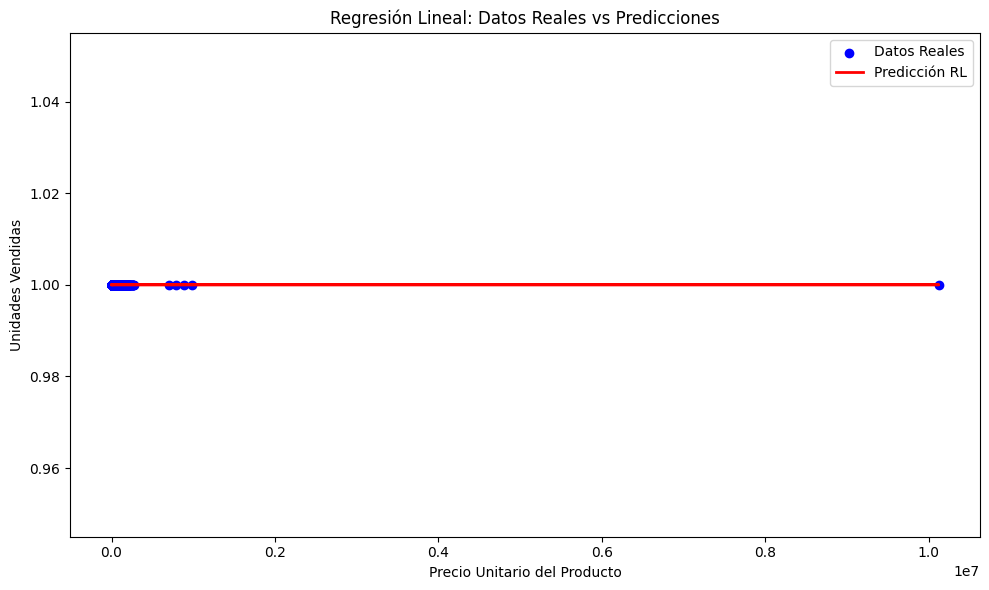

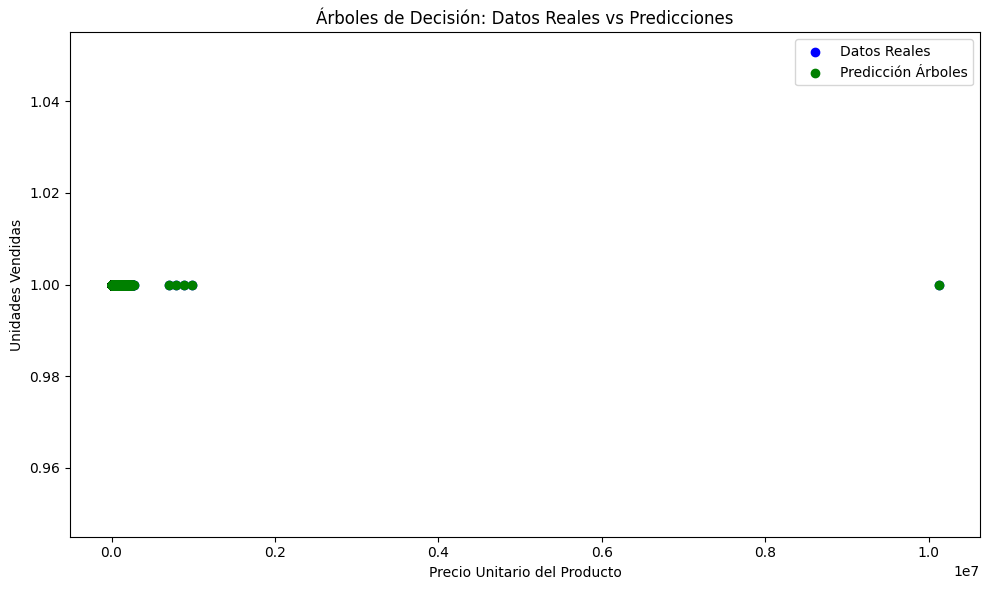

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset limpio
data = pd.read_csv('dataset_limpio.csv')

# Preparar datos
X = data[['Precio unitario del producto']]  # Características
y = data['Unidades Vendidas']  # Objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
# Regresión Lineal
model_rl = LinearRegression()
model_rl.fit(X_train, y_train)
y_pred_rl = model_rl.predict(X_test)

# Árboles de Decisión
model_tree = DecisionTreeRegressor()
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Evaluación de Modelos
# Regresión Lineal
mse_rl = mean_squared_error(y_test, y_pred_rl)
r2_rl = r2_score(y_test, y_pred_rl)

# Árboles de Decisión
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Resultados
regression_results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Árboles de Decisión'],
    'MSE': [mse_rl, mse_tree],
    'R2': [r2_rl, r2_tree]
})

print("Comparación de Modelos de Regresión:")
print(regression_results)

# Identificar el mejor modelo
if not regression_results.empty:
    best_model = regression_results.loc[regression_results['R2'].idxmax(), 'Modelo']
    print(f"\nEl mejor modelo de regresión es: {best_model}")

# Visualización de Resultados
# Regresión Lineal
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.plot(X_test, y_pred_rl, color='red', linewidth=2, label='Predicción RL')
plt.title('Regresión Lineal: Datos Reales vs Predicciones')
plt.xlabel('Precio Unitario del Producto')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.tight_layout()
plt.savefig('regresion_lineal.png')

# Árboles de Decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos Reales')
plt.scatter(X_test, y_pred_tree, color='green', label='Predicción Árboles')
plt.title('Árboles de Decisión: Datos Reales vs Predicciones')
plt.xlabel('Precio Unitario del Producto')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.tight_layout()
plt.savefig('arboles_decision.png')


